In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
#나눔글꼴 설치(단,설치 후 runtime restart 해주어야함)
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 155694 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.font_manager as fm #폰트 관련 용도

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dpath = ("/content/drive/MyDrive/코사다마/")

In [ ]:
fm.findSystemFonts()

['/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts

In [ ]:
mpl.get_cachedir()

'/root/.cache/matplotlib'

In [ ]:
fm._rebuild()

FileNotFoundError: ignored

In [ ]:
df_1 = pd.read_excel(dpath + 'COCO_1.xlsx', skiprows=5)

In [ ]:
df_2 = pd.read_csv(dpath + 'COCO_2.csv', encoding="CP949", thousands = ',')

In [ ]:
df_3 = pd.read_csv(dpath + 'COCO_3.csv', thousands = ',') # 보유주식수 데이터

In [ ]:
df_4 = pd.read_csv(dpath + 'COCO_4.csv', thousands = ',') # 주주수 데이터

# EDA

In [ ]:
df_1

,구분_2016,주주수_2016,비율,보유주식수_2016,비율.1,구분_2017,주주수_2017,비율.2,보유주식수_2017,비율.3,...,구분_2020,주주수_2020,비율.8,보유주식수_2020,비율.9,구분_2021,주주수_2021,비율.10,보유주식수_2021,비율.11
0,20세 미만,73302,1.5,132019660,0.4,20세 미만,78336,1.5,156719182,0.4,...,20세 미만,273710,3.0,211007347,0.4,20세 미만,656340,4.8,265591131,0.5
1,20대,240326,4.9,591480285,1.7,20대,254906,5.1,591851313,1.6,...,20대,1071086,11.8,1088305371,2.2,20대,2042786,14.9,1213247344,2.2
2,30대,954088,19.5,3880739883,11.5,30대,939703,18.8,3871483666,10.5,...,30대,1812487,19.9,4913455276,9.9,30대,2856757,20.8,4984466707,9.2
3,40대,1421435,29.1,9716624206,28.7,40대,1408217,28.1,10211262067,27.6,...,40대,2214905,24.3,12583185297,25.3,40대,3165661,23.0,13386412183,24.6
4,50대,1257549,25.7,11073389729,32.8,50대,1305194,26.1,12283638399,33.2,...,50대,1980018,21.7,16433297080,33.1,50대,2754873,20.0,18311600278,33.7
5,60대,649493,13.3,5654394112,16.7,60대,700180,14.0,6725549054,18.2,...,60대,1172221,12.9,9980957720,20.1,60대,1555875,11.3,11412649049,21.0
6,70대,234449,4.8,2286790689,6.8,70대,255558,5.1,2572532310,6.9,...,70대,401673,4.4,3516341273,7.1,70대,491060,3.6,3726492120,6.8
7,80세 이상,56802,1.2,476357600,1.4,80세 이상,63587,1.3,613299335,1.6,...,80세 이상,181128,2.0,945715979,1.9,80세 이상,213351,1.6,1069343993,2.0
8,합계,4887444,100.0,33811796164,100.0,합계,5005681,100.0,37026335326,100.0,...,합계,9107228,100.0,49672265343,100.0,합계,13736703,100.0,54369802805,100.0


In [ ]:
df_1 = df_1[:8]

In [ ]:
plt.rc("font", family="NanumGothic") #기본 폰트를 나눔고딕으로 변경

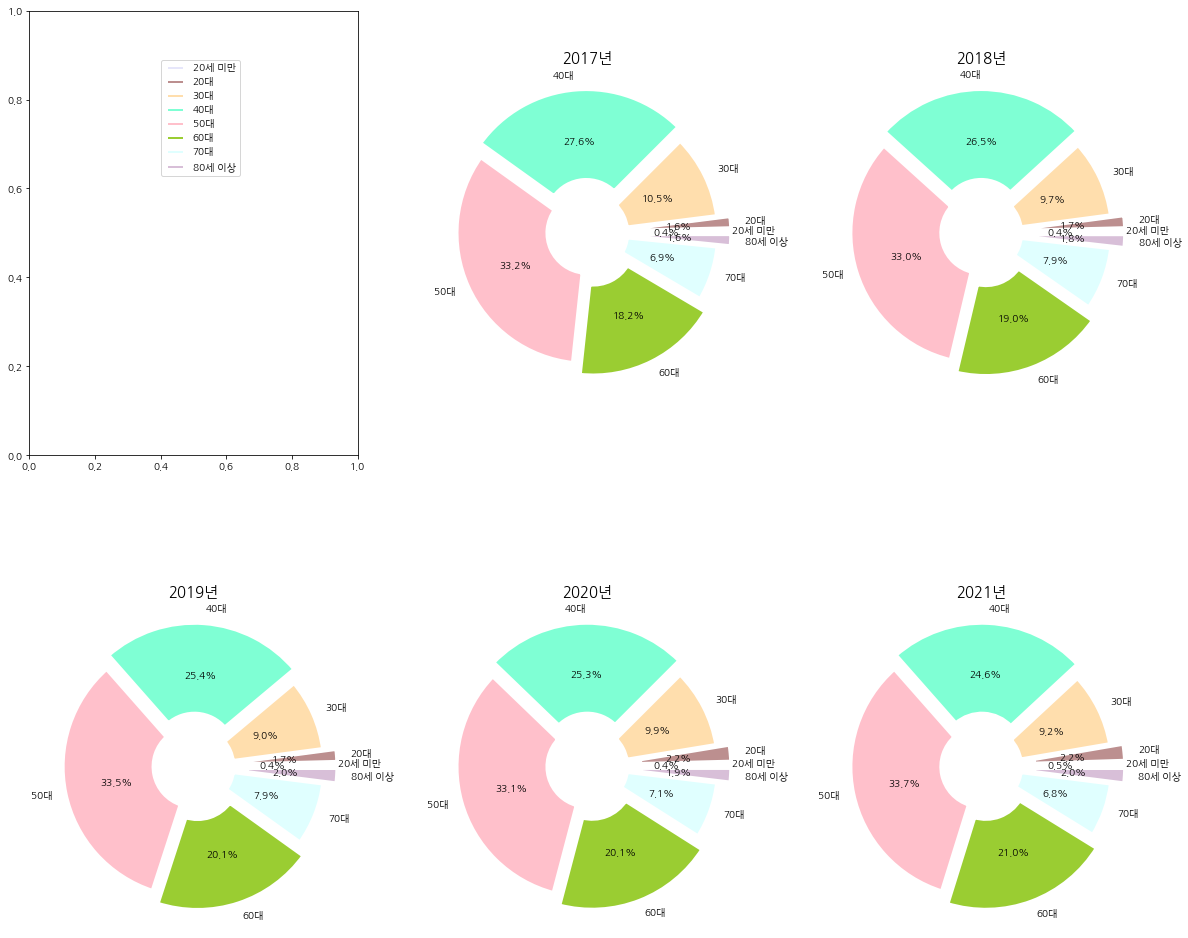

In [ ]:
# 각 연도별 주주수 별, 보유주식별 연령대에 따른 비율
labels = ['20세 미만', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상']
colors = ['lavender', 'rosybrown', 'navajowhite', 'aquamarine', 'pink', 'yellowgreen', 'lightcyan', 'thistle']

f, ax = plt.subplots(2, 3, figsize=(20, 18))
explode = [0, 0.10, 0, 0.10,0, 0.10, 0, 0.10] #파이의 원점에서 튀어나오는 정도
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} #테두리 설정

df_1['비율.3'].plot.pie(labels=labels, colors = colors, autopct = '%.1f%%',ax=ax[0][1],wedgeprops=wedgeprops, explode=explode)
ax[0][1].set_title('2017년', size = 15)
ax[0][1].set_ylabel('')

df_1['비율.5'].plot.pie(labels = labels, colors = colors, autopct = '%.1f%%',ax=ax[0][2],wedgeprops=wedgeprops, explode=explode)
ax[0][2].set_title('2018년', size = 15)
ax[0][2].set_ylabel('')

df_1['비율.7'].plot.pie(labels = labels, colors = colors, autopct = '%.1f%%',ax=ax[1][0],wedgeprops=wedgeprops, explode=explode)
ax[1][0].set_title('2019년', size = 15)
ax[1][0].set_ylabel('')

df_1['비율.9'].plot.pie(labels = labels, colors = colors, autopct = '%.1f%%',ax=ax[1][1],wedgeprops=wedgeprops, explode=explode)
ax[1][1].set_title('2020년', size = 15)
ax[1][1].set_ylabel('')

df_1['비율.11'].plot.pie(labels = labels, colors = colors, autopct = '%.1f%%',ax=ax[1][2],wedgeprops=wedgeprops, explode=explode)
ax[1][2].set_title('2021년', size = 15)
ax[1][2].set_ylabel('')

plt.legend(loc=(-2, 2.3))

In [ ]:
df_2

,날짜,코스닥,코스피,SP500,나스닥,비트코인,한국기준금리,미국기준금리,매매가_서울
0,2018-07-01,775.52,2295.26,2816.29,7671.79,8735000,1.50,1.91,573870
1,2018-08-01,816.97,2322.88,2901.52,8109.54,7870000,1.50,1.91,578331
2,2018-09-01,822.27,2343.07,2913.98,8046.35,7417000,1.50,1.95,587393
3,2018-10-01,648.67,2029.69,2711.74,7305.90,7162000,1.50,2.19,590915
4,2018-11-01,695.76,2096.86,2760.17,7330.54,4571000,1.75,2.20,591704
5,2018-12-01,675.65,2041.04,2506.85,6635.28,4199000,1.75,2.27,591674
6,2019-01-01,716.86,2204.85,2704.10,7281.74,3774000,1.75,2.40,648286
7,2019-02-01,731.25,2195.44,2784.49,7532.53,4240000,1.75,2.40,646174
8,2019-03-01,729.31,2140.67,2834.40,7729.32,4650000,1.75,2.41,644226
9,2019-04-01,754.74,2203.59,2945.83,8095.39,6124000,1.75,2.42,642954


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      48 non-null     object 
 1   코스닥     48 non-null     float64
 2   코스피     48 non-null     float64
 3   SP500   48 non-null     float64
 4   나스닥     48 non-null     float64
 5   비트코인    48 non-null     int64  
 6   한국기준금리  48 non-null     float64
 7   미국기준금리  48 non-null     float64
 8   매매가_서울  48 non-null     int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 3.5+ KB


In [ ]:
df_2[["비트코인","매매가_서울","매매가_강남"]] = df_2[["비트코인","매매가_서울","매매가_강남"]].astype(float)

KeyError: ignored

In [ ]:
df_2['날짜']= df_2['날짜'].astype('str')

In [ ]:
df_2['날짜'] = pd.to_datetime(df_2['날짜']) #데이터타입 정리

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      48 non-null     datetime64[ns]
 1   코스닥     48 non-null     float64       
 2   코스피     48 non-null     float64       
 3   SP500   48 non-null     float64       
 4   나스닥     48 non-null     float64       
 5   비트코인    48 non-null     float64       
 6   한국기준금리  48 non-null     float64       
 7   미국기준금리  48 non-null     float64       
 8   매매가_서울  48 non-null     float64       
 9   매매가_강남  48 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 3.9 KB


In [ ]:
for i, j in enumerate([KOSPI, KOSDAQ]):
  print(i, j)

0 0     2295.26
1     2322.88
2     2343.07
3     2029.69
4     2096.86
5     2041.04
6     2204.85
7     2195.44
8     2140.67
9     2203.59
10    2041.74
11    2130.62
12    2024.55
13    1967.79
14    2063.05
15    2083.48
16    2087.96
17    2197.67
18    2119.01
19    1987.01
20    1754.64
21    1947.56
22    2029.60
23    2108.33
24    2249.37
25    2326.17
26    2327.89
27    2267.15
28    2591.34
29    2873.47
30    2976.21
31    3012.95
32    3061.42
33    3147.86
34    3203.92
35    3296.68
36    3202.32
37    3199.27
38    3068.82
39    2970.68
40    2839.01
41    2977.65
42    2663.34
43    2699.18
44    2757.65
45    2695.05
46    2685.90
47    2332.64
Name: 코스피, dtype: float64
1 0      775.52
1      816.97
2      822.27
3      648.67
4      695.76
5      675.65
6      716.86
7      731.25
8      729.31
9      754.74
10     696.47
11     690.53
12     630.18
13     610.55
14     621.76
15     658.52
16     632.99
17     669.83
18     642.48
19     610.73
20     569.07
21  

In [ ]:
colors=px.colors.qualitative.Plotly

DATE = df_2["날짜"].unique()
KOSPI = df_2["코스피"]
KOSDAQ = df_2["코스닥"]

fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
for i, j in enumerate([KOSPI, KOSDAQ]):
    fig.add_trace(go.Scatter(x=DATE, y=j, mode='lines', name=j.name, marker_color=colors[i]), row=i+1, col=1) #i와 j가 각각 무엇을 나타내는지
fig.update_xaxes(rangeslider_visible=False,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(step="all")])),row=1,col=1)
fig.update_layout(title='KOSPI and KOSDAQ Price Trend in 2018/7~2022/6',height=700, 
                  yaxis1=dict(title='KOSPI'),  #dict을 쓰는 이유가 무엇인지
                  yaxis2_title='KOSDAQ',
                  showlegend=True)
fig.show()

In [ ]:
DATE = df_2["날짜"].unique()
KOSPI = df_2["SP500"]
KOSDAQ = df_2["나스닥"]

fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True)
for i, j in enumerate([KOSPI, KOSDAQ]):
    fig.add_trace(go.Scatter(x=DATE, y=j, mode='lines',
                             name=j.name, marker_color=colors[i]), row=i+1, col=1)
fig.update_xaxes(rangeslider_visible=False,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(step="all")])),row=1,col=1)
fig.update_layout(title='SP500 and NASDAQ Price Trend in 2018/7~2022/6',height=700, 
                  yaxis1=dict(title='SP500'), 
                  yaxis2_title='NASDAQ',
                  showlegend=True)
fig.show()

In [ ]:
DATE = df_2["날짜"].unique()
KOSPI = df_2["비트코인"]
KOSDAQ = df_2["매매가_서울"]

fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True)
for i, j in enumerate([KOSPI, KOSDAQ]):
    fig.add_trace(go.Scatter(x=DATE, y=j, mode='lines',
                             name=j.name, marker_color=colors[i]), row=i+1, col=1)
fig.update_xaxes(rangeslider_visible=False,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(step="all")])),row=1,col=1)
fig.update_layout(title='Bitcoin and House Price Trend in 2018/7~2022/6',height=700, 
                  yaxis1=dict(title='Bitcoin'), 
                  yaxis2_title='House Price',
                  showlegend=True)
fig.show()

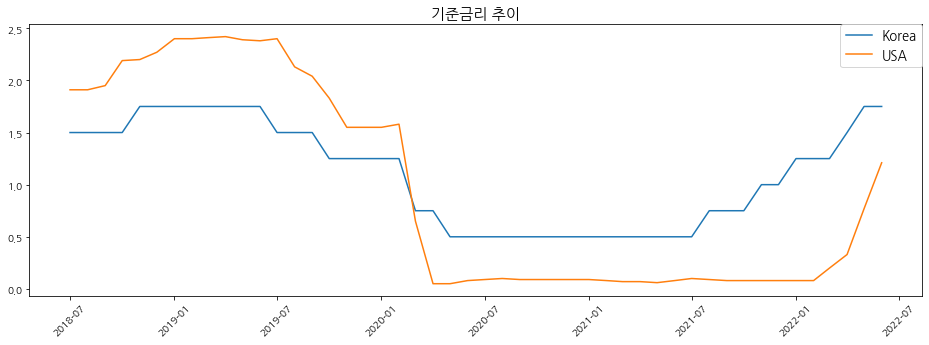

In [ ]:
plt.figure(figsize=(16,5))

plt.title("기준금리 추이", fontsize=15)

plt.plot(df_2['날짜'], df_2['한국기준금리'], label='Korea')

plt.plot(df_2['날짜'], df_2['미국기준금리'], label= 'USA')
plt.rc("font", family="NanumGothic")
plt.legend(borderaxespad=0, fontsize=13)
plt.xticks(rotation=45)

plt.show()

In [ ]:
df_3

,Year,KOSPI,KOSDAQ,under20,Twenties,Thirties,Fourties,Fifties,Sixties,Seventies,over80
0,2016,2026.46,631.44,132019660,591480285,3880739883,9716624206,11073389729,5654394112,2286790689,476357600
1,2017,2467.00,798.42,156719182,591851313,3871483666,10211262067,12283638399,6725549054,2572532310,613299335
2,2018,2041.00,948.65,158873233,706507805,3965382345,10808161586,13461875469,7761564791,3200488189,741881903
3,2019,2198.00,669.83,161770035,762222226,3981517739,11235426217,14776866548,8876896090,3493883529,879206899
4,2020,2873.00,968.42,211007347,1088305371,4913455276,12583185297,16433297080,9980957720,3516341273,945715979
5,2021,2978.00,1033.98,265591131,1213247344,4984466707,13386412183,18311600278,11412649049,3726492120,1069343993


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       6 non-null      int64  
 1   KOSPI      6 non-null      float64
 2   KOSDAQ     6 non-null      float64
 3   under20    6 non-null      int64  
 4   Twenties   6 non-null      int64  
 5   Thirties   6 non-null      int64  
 6   Fourties   6 non-null      int64  
 7   Fifties    6 non-null      int64  
 8   Sixties    6 non-null      int64  
 9   Seventies  6 non-null      int64  
 10  over80     6 non-null      int64  
dtypes: float64(2), int64(9)
memory usage: 656.0 bytes


In [ ]:
df_4

,Year,KOSPI,KOSDAQ,under20,Twenties,Thirties,Fourties,Fifties,Sixties,Seventies,over80
0,2016,2026.46,631.44,73302,240326,954088,1421435,1257549,649493,234449,56802
1,2017,2467.00,798.42,78336,254906,939703,1408217,1305194,700180,255558,63587
2,2018,2041.00,948.65,92766,316956,1041910,1533553,1427594,787420,282528,72928
3,2019,2198.00,669.83,98612,381910,1072120,1576373,1510653,948584,363893,164336
4,2020,2873.00,968.42,273710,1071086,1812487,2214905,1980018,1172221,401673,181128
5,2021,2978.00,1033.98,656340,2042786,2856757,3165661,2754873,1555875,491060,213351


In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       6 non-null      int64  
 1   KOSPI      6 non-null      float64
 2   KOSDAQ     6 non-null      float64
 3   under20    6 non-null      int64  
 4   Twenties   6 non-null      int64  
 5   Thirties   6 non-null      int64  
 6   Fourties   6 non-null      int64  
 7   Fifties    6 non-null      int64  
 8   Sixties    6 non-null      int64  
 9   Seventies  6 non-null      int64  
 10  over80     6 non-null      int64  
dtypes: float64(2), int64(9)
memory usage: 656.0 bytes


# 상관분석

In [ ]:
heatmap_data = df_2[["코스닥", "코스피", "SP500", "나스닥", "비트코인", "한국기준금리", "미국기준금리", "매매가_서울"]]

In [ ]:
df_2.corr(method="spearman")

,코스닥,코스피,SP500,나스닥,비트코인,한국기준금리,미국기준금리,매매가_서울
코스닥,1.000000,0.958207,0.799066,0.829570,0.764872,-0.481984,-0.595207,0.677920
코스피,0.958207,1.000000,0.807099,0.816109,0.754776,-0.450360,-0.549980,0.685953
SP500,0.799066,0.807099,1.000000,0.976878,0.928029,-0.527805,-0.704646,0.894051
나스닥,0.829570,0.816109,0.976878,1.000000,0.928029,-0.643053,-0.792536,0.877985
비트코인,0.764872,0.754776,0.928029,0.928029,1.000000,-0.557257,-0.740217,0.850738
한국기준금리,-0.481984,-0.450360,-0.527805,-0.643053,-0.557257,1.000000,0.814133,-0.452086
미국기준금리,-0.595207,-0.549980,-0.704646,-0.792536,-0.740217,0.814133,1.000000,-0.693790
매매가_서울,0.677920,0.685953,0.894051,0.877985,0.850738,-0.452086,-0.693790,1.000000


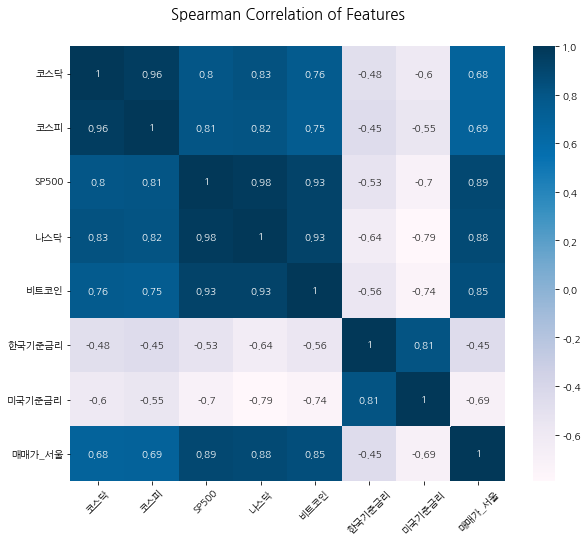

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.rc("font", family="NanumGothic")
plt.title("Spearman Correlation of Features", y = 1.05, size = 15)
plt.xticks(rotation=45)
mpl.rcParams["axes.unicode_minus"] = False #마이너스 깨짐 방지
sns.heatmap(heatmap_data.corr(method="spearman"), square = True, cmap = colormap, linecolor = "white", annot = True)

In [ ]:
df_3 = df_3[["KOSPI","KOSDAQ","under20","Twenties","Thirties","Fourties","Fifties","Sixties","Seventies","over80"]]

KeyError: ignored

In [ ]:
df_3.corr(method="spearman")

,KOSPI,KOSDAQ,under20,Twenties,Thirties,Fourties,Fifties,Sixties,Seventies,over80
KOSPI,1.000000,0.828571,0.828571,0.828571,0.657143,0.828571,0.828571,0.828571,0.828571,0.828571
KOSDAQ,0.828571,1.000000,0.828571,0.828571,0.714286,0.828571,0.828571,0.828571,0.828571,0.828571
under20,0.828571,0.828571,1.000000,1.000000,0.942857,1.000000,1.000000,1.000000,1.000000,1.000000
Twenties,0.828571,0.828571,1.000000,1.000000,0.942857,1.000000,1.000000,1.000000,1.000000,1.000000
Thirties,0.657143,0.714286,0.942857,0.942857,1.000000,0.942857,0.942857,0.942857,0.942857,0.942857
Fourties,0.828571,0.828571,1.000000,1.000000,0.942857,1.000000,1.000000,1.000000,1.000000,1.000000
Fifties,0.828571,0.828571,1.000000,1.000000,0.942857,1.000000,1.000000,1.000000,1.000000,1.000000
Sixties,0.828571,0.828571,1.000000,1.000000,0.942857,1.000000,1.000000,1.000000,1.000000,1.000000
Seventies,0.828571,0.828571,1.000000,1.000000,0.942857,1.000000,1.000000,1.000000,1.000000,1.000000
over80,0.828571,0.828571,1.000000,1.000000,0.942857,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_3 = df_3.corr(method="spearman")

KeyError: ignored

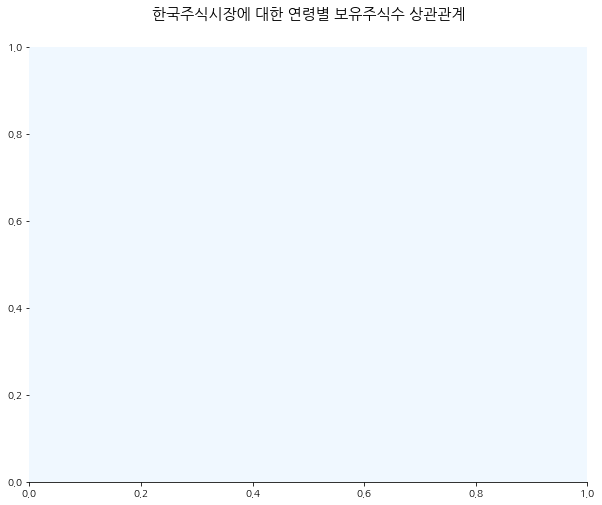

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("한국주식시장에 대한 연령별 보유주식수 상관관계", y = 1.05, size = 15, color='black')
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_facecolor('aliceblue')
plt.plot(df_3["KOSPI"], label='KOSPI', color='firebrick');
plt.plot(df_3["KOSDAQ"], label='KOSDAQ',  color='darkblue');
plt.legend()
plt.show()

#30대의 보유주식수와 상관관계가 제일 낮다는 뜻?
#30대의 보유주식수가 코스피, 코스닥에 영향을 크게 미치지 않는다는 뜻?

In [ ]:
df_4 = df_4[["KOSPI","KOSDAQ","under20","Twenties","Thirties","Fourties","Fifties","Sixties","Seventies","over80"]]

In [ ]:
df_4.corr(method="spearman")

,KOSPI,KOSDAQ,under20,Twenties,Thirties,Fourties,Fifties,Sixties,Seventies,over80
KOSPI,1.000000,0.828571,0.828571,0.828571,0.657143,0.657143,0.828571,0.828571,0.828571,0.828571
KOSDAQ,0.828571,1.000000,0.828571,0.828571,0.714286,0.714286,0.828571,0.828571,0.828571,0.828571
under20,0.828571,0.828571,1.000000,1.000000,0.942857,0.942857,1.000000,1.000000,1.000000,1.000000
Twenties,0.828571,0.828571,1.000000,1.000000,0.942857,0.942857,1.000000,1.000000,1.000000,1.000000
Thirties,0.657143,0.714286,0.942857,0.942857,1.000000,1.000000,0.942857,0.942857,0.942857,0.942857
Fourties,0.657143,0.714286,0.942857,0.942857,1.000000,1.000000,0.942857,0.942857,0.942857,0.942857
Fifties,0.828571,0.828571,1.000000,1.000000,0.942857,0.942857,1.000000,1.000000,1.000000,1.000000
Sixties,0.828571,0.828571,1.000000,1.000000,0.942857,0.942857,1.000000,1.000000,1.000000,1.000000
Seventies,0.828571,0.828571,1.000000,1.000000,0.942857,0.942857,1.000000,1.000000,1.000000,1.000000
over80,0.828571,0.828571,1.000000,1.000000,0.942857,0.942857,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_4 = df_4.corr(method="spearman")

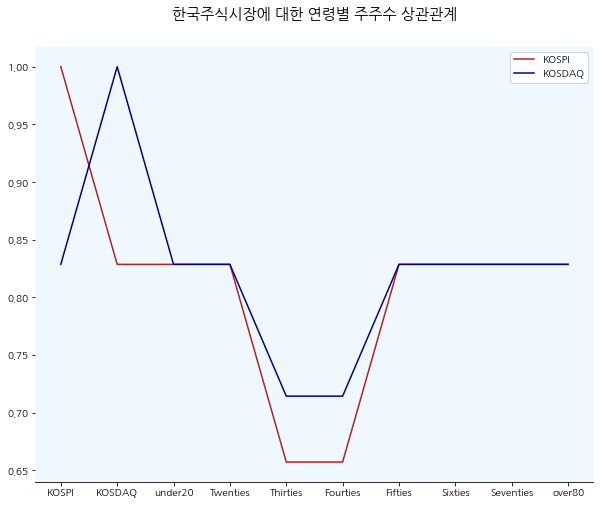

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("한국주식시장에 대한 연령별 주주수 상관관계", y = 1.05, size = 15, color='black')
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_facecolor('aliceblue')
plt.plot(df_4["KOSPI"], label='KOSPI', color='firebrick');
plt.plot(df_4["KOSDAQ"], label='KOSDAQ',  color='darkblue');
plt.legend()
plt.show()
#연령별 주주수 역시 30~40대가 가장 상관관계가 낮다는 뜻?
#30대와 40대 주주수는 코스피에 영향을 덜 미친다는 뜻?

# 회귀분석

In [ ]:
from statsmodels.formula.api import ols
model1 = ols("코스피 ~ SP500 + 나스닥 + 비트코인 + 한국기준금리 + 미국기준금리 + 매매가_서울", data=df_2)
fitted1 = model1.fit()
print(fitted1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:                    코스피   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     70.74
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.77e-20
Time:                        00:44:45   Log-Likelihood:                -300.93
No. Observations:                  48   AIC:                             615.9
Df Residuals:                      41   BIC:                             629.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1516.3488    332.218      4.564      0.0

In [ ]:
from statsmodels.formula.api import ols
model2 = ols("코스닥 ~ SP500 + 나스닥 + 비트코인 + 한국기준금리 + 미국기준금리 + 매매가_서울", data=df_2)
fitted2 = model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                    코스닥   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     60.87
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           7.55e-19
Time:                        00:44:45   Log-Likelihood:                -250.26
No. Observations:                  48   AIC:                             514.5
Df Residuals:                      41   BIC:                             527.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    556.6830    115.581      4.816      0.0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# VIF of KOSPI

for i in range(1,7):
  print(model1.exog_names[i] + ": " + str(variance_inflation_factor(model1.exog, i).round(3))) # numeric을 붙일때 str을 이용함.

SP500: 80.923
나스닥: 102.362
비트코인: 7.838
한국기준금리: 15.009
미국기준금리: 16.089
매매가_서울: 9.078


In [ ]:
# VIF of KOSDAQ
# 같은 자료이기에 KOSPI와 VIF가 같음
for i in range(1,7):
  print(model2.exog_names[i] + ": " + str(variance_inflation_factor(model2.exog, i).round(3))) # numeric을 붙일때 str을 이용함.
# 통상적으로 VIF가 10미만일 경우 다중공선성이 없다라고 판단하며 비트코인과 매매가_서울만이 VIF가 10미만으로
# 다중공선성이 없다라고 이야기 할 수 있다.

SP500: 80.923
나스닥: 102.362
비트코인: 7.838
한국기준금리: 15.009
미국기준금리: 16.089
매매가_서울: 9.078


결론(코스피) : 코스피를 반응변수로 한 회귀분석 결과 F_통계량이 4.77e-20으로 모형은 한 개 이상의 독립요인에 영향을 받으므로 모형은 적합함을 확인할 수 있었다. 나스닥과 매매가_서울만이 적합했으나 VIF를 확인해본 결과 매매가_서울과 비트코인만이 다중공선성이 없었고 따라서 매매가_서울만을 요인으로 볼 수 있다. 하지만 Durbin-Watson통계량 또한 0.789로 0~2사이에 존재하므로 잔차가 약간의 음의 상관성을 갖고 있는 모형이다.

결론(코스닥) : 코스닥을 반응변수로 한 회귀분석 결과 F_통계량이 7.55e-19으로 모형은 한 개 이상의 독립요인에 영향을 받으므로 모형은 적합함을 확인할 수 있었다.한국기준금리와 매매가_서울만이 적합했으나 VIF를 확인해본 결과 매매가_서울과 비트코인만이 다중공선성이 없었고 따라서 매매가_서울만을 요인으로 볼 수 있다.
코스닥은 Durbin-Watson통계량 또한 1.226으로 2에 가까움으로 잔차의 자기상관 또한 존재하지 않는다. 

따라서 매매가_서울은 코스피와 코스닥을 변동시키는 요인이라고 이야기할 수 있다.


In [ ]:
from statsmodels.formula.api import ols
model3 = ols("매매가_서울 ~ 코스피 + 코스닥", data=df_2)
fitted3 = model3.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                 매매가_서울   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     16.26
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.86e-06
Time:                        00:44:45   Log-Likelihood:                -607.34
No. Observations:                  48   AIC:                             1221.
Df Residuals:                      45   BIC:                             1226.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.442e+05   6.64e+04      5.183      0.0

In [ ]:
# VIF of 매매가_서울
for i in range(1,3):
  print(model3.exog_names[i] + ": " + str(variance_inflation_factor(model3.exog, i).round(3)))

코스피: 11.813
코스닥: 11.813


하지만 매매가_서울을 반응변수로 코스피와 코스닥을 확인한 결과 
이 모형의 F-통계량은 4.86e-06으로 모형엔 적합하나 코스피와 코스닥은 매매가_서울에 영향을 끼치는 변수가 아니다 그이유를 확인해보고자 VIF를 실행해본 결과 둘의 VIF가 11.813으로 다중공선성이 존재하기에 이러한 결과가 나왔다. 따라서 매매가_서울은 코스피와 코스닥에 영향을 끼치는 변수인 한편 코스피와 코스닥은 매매가_서울에 영향을 끼치는 변수가 아니다.

In [ ]:
from statsmodels.formula.api import ols
model1 = ols("코스피 ~ SP500 + 나스닥 + 비트코인 + 한국기준금리 + 미국기준금리 + 매매가_강남", data=df_2)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                    코스피   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     69.91
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           5.94e-20
Time:                        00:44:46   Log-Likelihood:                -301.19
No. Observations:                  48   AIC:                             616.4
Df Residuals:                      41   BIC:                             629.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1601.1215    348.015      4.601      0.0

In [ ]:
from statsmodels.formula.api import ols
model1 = ols("코스닥 ~ SP500 + 나스닥 + 비트코인 + 한국기준금리 + 미국기준금리 + 매매가_강남", data=df_2)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                    코스닥   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     60.24
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           9.14e-19
Time:                        00:44:46   Log-Likelihood:                -250.48
No. Observations:                  48   AIC:                             515.0
Df Residuals:                      41   BIC:                             528.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    588.6005    120.995      4.865      0.0

In [ ]:
# VIF of KOSPI

for i in range(1,7):
  print(model1.exog_names[i] + ": " + str(variance_inflation_factor(model1.exog, i).round(3))) # numeric을 붙일때 str을 이용함.

SP500: 81.359
나스닥: 102.381
비트코인: 7.837
한국기준금리: 15.768
미국기준금리: 17.215
매매가_강남: 9.934
